<h1>Machine Learning for Data Analysis</h1>
<i><h2>Week 3 - Lasso Regression</h2></i>

The data set I am using is the Gapminder data set. A series of observational variables that have independent sources that have been centralised into one set.

I am investigating the association between incomeperperson and armedforcesrate. The association, or hypothesis, I am expecting is for higher incomeperperson there will be a lower armedforcesrate. So my coefficient to my explanetory variable should be less than 0. I will also be looking at the type of government, the polityscore variable, and seeing if that has a confounding effect.

For Lasso Regression I will not categorise my variables and I will add in several more to see if I've missed any variables of importance.

<h3>SET UP</h3>

<i>Import appropraite packages and set appropriate options</i>

In [1]:
import pandas as pd
import numpy as np
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LassoLarsCV
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn
%matplotlib inline

In [2]:
pd.set_option('display.float_format', '{:,.2f}'.format)

<i>Read in the data set</i>

In [3]:
usecols = ['incomeperperson', 'armedforcesrate', 'polityscore', 'country', \
           'lifeexpectancy', 'alcconsumption','co2emissions', 'urbanrate', \
           'suicideper100th']
gap_data = pd.read_csv('gapminder.csv', usecols = usecols, index_col='country')

<i>Replace spaces with blanks and coerce into numeric, replacing the spaces with an empty string is needed for converting to numeric</i>

In [4]:
gap_data.loc[:,'incomeperperson'] = pd.to_numeric(gap_data['incomeperperson'].replace(' ',''))
gap_data.loc[:,'armedforcesrate'] = pd.to_numeric(gap_data['armedforcesrate'].replace(' ',''))
gap_data.loc[:,'polityscore'] = pd.to_numeric(gap_data['polityscore'].replace(' ',''))
gap_data.loc[:,'lifeexpectancy'] = pd.to_numeric(gap_data['lifeexpectancy'].replace(' ',''))
gap_data.loc[:,'alcconsumption'] = pd.to_numeric(gap_data['alcconsumption'].replace(' ',''))
gap_data.loc[:,'co2emissions'] = pd.to_numeric(gap_data['co2emissions'].replace(' ',''))
gap_data.loc[:,'urbanrate'] = pd.to_numeric(gap_data['urbanrate'].replace(' ',''))
gap_data.loc[:,'suicideper100th'] = pd.to_numeric(gap_data['suicideper100th'].replace(' ',''))

<i>Remove any rows where there are nulls</i>

In [5]:
gap_data.dropna(inplace = True)

<i>Look at some information about the data set</i>

In [6]:
gap_data.dtypes

incomeperperson    float64
alcconsumption     float64
armedforcesrate    float64
co2emissions       float64
lifeexpectancy     float64
polityscore        float64
suicideper100th    float64
urbanrate          float64
dtype: object

In [7]:
gap_data.describe()

,incomeperperson,alcconsumption,armedforcesrate,co2emissions,lifeexpectancy,polityscore,suicideper100th,urbanrate
count,147.00,147.00,147.00,147.00,147.00,147.00,147.00,147.00
mean,"6,834.70",6.93,1.39,"6,735,854,963.72",69.06,3.81,9.99,56.36
std,"9,940.24",5.13,1.55,"29,857,863,523.92",9.91,6.21,6.42,22.05
min,103.78,0.05,0.00,"850,666.67",47.79,-10.00,0.20,10.40
25%,576.39,2.62,0.46,"98,019,166.67",62.28,-2.00,5.91,38.17
50%,"2,231.99",6.12,0.93,"428,006,333.33",72.97,6.00,8.97,59.46
75%,"7,063.96",10.12,1.60,"2,577,938,000.00",76.13,9.00,12.64,73.02
max,"39,972.35",23.01,9.82,"334,220,872,333.33",83.39,10.00,35.75,100.00


<h3>Assignment - Calculations</h3>

<i>Split the columns into two sub-sets, the predictor and the target variables</i>

In [8]:
predictor_vars = gap_data[['incomeperperson', 'polityscore', \
                           'lifeexpectancy', 'alcconsumption', \
                           'urbanrate', 'suicideper100th']]
targets_vars = gap_data['armedforcesrate']

<i>Standardise the predictos - All the predictors are not categorical so I don't need to convert them to 'float64' format - Standardising the variables means transforming the variables to have a mean of 0 and a standard deviation of 1</i>

In [9]:
predictors = predictor_vars.copy()

In [10]:
for col in predictor_vars:
    predictors.loc[:,col] = preprocessing.scale(predictors.loc[:,col])

In [11]:
predictors.describe().loc[['mean','std'],:]

,incomeperperson,polityscore,lifeexpectancy,alcconsumption,urbanrate,suicideper100th
mean,-0.00,0.00,-0.00,0.00,-0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00


<i>This splits the data set into roughly 90% training set, and roughly 10% test set - I felt that I wanted to have a test set to compare with at the end but have very few observations so have kept the percentage split very severe</i>

In [12]:
pred_train, pred_test, tar_train, tar_test = train_test_split(predictors, targets_vars, test_size = 0.1)

In [13]:
print('Predictors : training',pred_train.shape, \
      '\nPredictors : testing ',pred_test.shape, \
      '\nTarget     : training',tar_train.shape, \
      '\nTarget     : testing ',tar_test.shape)

Predictors : training (132, 6) 
Predictors : testing  (15, 6) 
Target     : training (132,) 
Target     : testing  (15,)


In [14]:
print("training : ",round((132 / 147) * 100, 2), "%", "\ntest     : ",round((15 / 147) * 100, 2), "%")

training :  89.8 % 
test     :  10.2 %


<i>Creating the model</i>

In [15]:
model = LassoLarsCV(cv = 10, precompute = False).fit(pred_train, tar_train)

<i>Creating a dictionary of the predictor name and it's coefficient value</i>

In [16]:
dict(zip(predictors.columns, model.coef_))

{'alcconsumption': -0.17700731878782702,
 'incomeperperson': -0.15790575123734332,
 'lifeexpectancy': 0.43097137262776086,
 'polityscore': -0.52900753415678903,
 'suicideper100th': 0.0,
 'urbanrate': 0.32119778099919016}

<i>Plot Coefficient Progression</i>

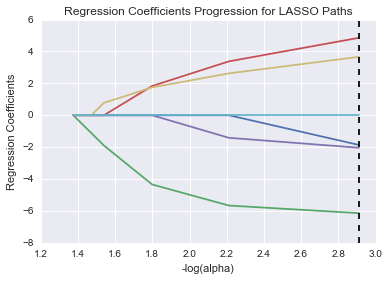

In [17]:
m_log_alphas = -np.log10(model.alphas_)
ax = plt.gca()
plt.plot(m_log_alphas, model.coef_path_.T)
plt.axvline(-np.log10(model.alpha_), linestyle = '--', color = 'k', \
            label = 'alpha CV')
plt.ylabel('Regression Coefficients')
plt.xlabel('-log(alpha)')
plt.title('Regression Coefficients Progression for LASSO Paths')

<i>Plot Mean Square Error for each fold - There are 10 folds</i>

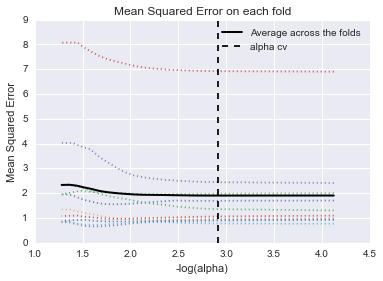

In [18]:
m_log_alphascv = -np.log10(model.cv_alphas_)
plt.figure()
plt.plot(m_log_alphascv, model.cv_mse_path_, ':')
plt.plot(m_log_alphascv, model.cv_mse_path_.mean(axis = -1), color = 'k', \
         label = 'Average across the folds', linewidth = 2)
plt.axvline(-np.log10(model.alpha_), linestyle = '--', \
            color = 'k', label = 'alpha cv')
plt.legend()
plt.xlabel('-log(alpha)')
plt.ylabel('Mean Squared Error')
plt.title('Mean Squared Error on each fold')

<i>Mean Squared Error from the training and test data sets</i>

In [19]:
train_error = mean_squared_error(tar_train, model.predict(pred_train))
test_error = mean_squared_error(tar_test, model.predict(pred_test))
print('The train error is : ', train_error, '\nThe test error is  : ', test_error)

The train error is :  1.70081528202 
The test error is  :  2.76544198065


<i>R-Squared from training and test value</i>

In [20]:
rsquared_train = model.score(pred_train, tar_train)
rsquared_test = model.score(pred_test, tar_test)
print('The R-Squared training value is : ', round(rsquared_train * 100, 2), \
      "%", '\nThe R-Squared test value is     : ', round(rsquared_test * 100, 2), "%")

The R-Squared training value is :  25.15 % 
The R-Squared test value is     :  18.42 %


<h3>Assignment - Written Analysis</h3>

I conducted a LASSO (Least Absolute Selection Shrinkage Operator) Regression Analysis to identify a subset of variables from a set of 6 quantitative predictor variables that best predict the quantitative response variable armedforcesrate. The predictor variables are alcconsumption, the amount of alcohol per capita drunk by an adult; imcomeperperson, the Gross Domestic Product per capita; lifeexpectancy, 2011 life expectancy at birth; polityscore, 2009 Democracy Score; suicideper100th, 2005 suicides per 100,000; and urbanrate, 2008 percentage of the population that lives in Urban areas. All the predictor variables have been standardised to have a mean of 0 and a standard deviation of 1. Standardising the variables to the same scale, mean of 0 standard deviation of 1, means that the tuning parameter $\lambda$ is meaningful for all the variables.

The data was randomply split into a training set containing 90% of the data, and a testing set that included 10% of the observations. The LAR (Least Angle Regression) algorithm using 10 folds for the cross validation to estimate the LASSO regression model with the training set. The model was validated using the test set. The method uses the change in the cross validation average squared error at each step to identify the best subset of perdictor variables. See Out[55] above for the Mean Square Error (y-axis) for each fold (seperate plotted lines) as the tuning parameter (x-axis) increases.

5 of the 6 variables have been retained in the selected model. The variable suicideper100th has been removed from the model as shown by the coefficient being 0. During the estimation process the variables urbanrate and polityscore were the most strongly associated with the proportion of the work force employed in active army duty. The variable urbanrate was more strongly associated with armedforcesrate but ended up with a lower coefficient than lifeexpectancy implying that it has a bigger impact on the target. The other predictors are alcconsumption and incomeperperson. Most of the coefficients are negative which implies the variables have a negative impact on the target variable value.

The 5 variables that are in the selected model account for 25% of the variability in the training data set, and 18% of the variability in the test set. These values seem quite low so I think this model is not very well fitting.